<a href="https://colab.research.google.com/github/carolinehagood/covid-project/blob/main/Combined_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

cross-correlation function (CCF)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Total_cleaned_data.csv')
df.tail()

,Unnamed: 0,Start Date,End Date,Year,Week,COVID-19 Deaths,Total_Doses
152,152,11/27/2022,12/03/2022,2022,48.0,2599.0,8555943
153,153,12/04/2022,12/10/2022,2022,49.0,3042.0,10084795
154,154,12/11/2022,12/17/2022,2022,50.0,3194.0,13553377
155,155,12/18/2022,12/24/2022,2022,51.0,3325.0,11639399
156,156,12/25/2022,12/31/2022,2022,52.0,3668.0,9247948


In [ ]:
del df['Unnamed: 0']
print(df)

     Start Date    End Date       Year  Week  COVID-19 Deaths  Total_Doses
0    12/29/2019  01/04/2020  2019/2020   1.0              0.0      2082861
1    01/05/2020  01/11/2020       2020   2.0              1.0      3136353
2    01/12/2020  01/18/2020       2020   3.0              2.0      5371448
3    01/19/2020  01/25/2020       2020   4.0              3.0      6999168
4    01/26/2020  02/01/2020       2020   5.0              0.0      8741069
..          ...         ...        ...   ...              ...          ...
152  11/27/2022  12/03/2022       2022  48.0           2599.0      8555943
153  12/04/2022  12/10/2022       2022  49.0           3042.0     10084795
154  12/11/2022  12/17/2022       2022  50.0           3194.0     13553377
155  12/18/2022  12/24/2022       2022  51.0           3325.0     11639399
156  12/25/2022  12/31/2022       2022  52.0           3668.0      9247948

[157 rows x 6 columns]


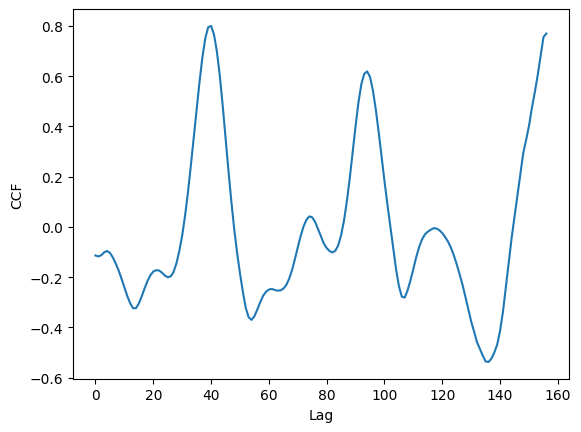

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import ccf

# Calculate the cross-correlation function (CCF)
ccf_result = ccf(df['COVID-19 Deaths'], df['Total_Doses'])

# Plot the CCF
plt.plot(ccf_result)
plt.xlabel('Lag')
plt.ylabel('CCF')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

# Calculate Pearson's correlation coefficient and p-value
x = df['Total_Doses']
y = df['COVID-19 Deaths']
corr_coefficient, p_value = pearsonr(x, y)

print(f"Pearson's correlation coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")


Pearson's correlation coefficient: -0.11341374715887773
P-value: 0.15727920273705934


In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

#Calculating Granger Causality
x = df['Total_Doses']
y = df['COVID-19 Deaths']
data = pd.DataFrame({'x': x, 'y': y})

max_lag = 5
grangercausalitytests(data, max_lag)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2101  , p=0.6473  , df_denom=153, df_num=1
ssr based chi2 test:   chi2=0.2142  , p=0.6435  , df=1
likelihood ratio test: chi2=0.2141  , p=0.6436  , df=1
parameter F test:         F=0.2101  , p=0.6473  , df_denom=153, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0976  , p=0.9070  , df_denom=150, df_num=2
ssr based chi2 test:   chi2=0.2018  , p=0.9040  , df=2
likelihood ratio test: chi2=0.2016  , p=0.9041  , df=2
parameter F test:         F=0.0976  , p=0.9070  , df_denom=150, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6175  , p=0.6047  , df_denom=147, df_num=3
ssr based chi2 test:   chi2=1.9407  , p=0.5848  , df=3
likelihood ratio test: chi2=1.9286  , p=0.5874  , df=3
parameter F test:         F=0.6175  , p=0.6047  , df_denom=147, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.2883  , p=0.0627  

{1: ({'ssr_ftest': (0.21008956057079, 0.6473475886905798, 153.0, 1),
   'ssr_chi2test': (0.2142089637192369, 0.6434882742465129, 1),
   'lrtest': (0.21406202936395857, 0.6436020867981656, 1),
   'params_ftest': (0.21008956057084097, 0.6473475886905266, 153.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.09762997306536278, 0.9070420356968404, 150.0, 2),
   'ssr_chi2test': (0.20176861100174975, 0.9040376190152497, 2),
   'lrtest': (0.20163740043062717, 0.9040969306069591, 2),
   'params_ftest': (0.09762997306537866, 0.9070420356968328, 150.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.6174991913254984, 0.6047266552283763, 147.0, 3),
   'ssr_chi2test': (1.940711744165852, 0.5848029280005878, 3),
   'lrtest': (1.9285850700234732, 0.5873606246501895, 3),
   'params_ftest': (0.6174991913255017, 0.6047266552283763, 147.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0